In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import scipy.spatial
import sklearn.metrics

In [100]:
df = pd.read_csv('../../../piw-route-choice-varying-beta_routes_usage.csv')
df = df.set_index("route")
#df = df.drop(columns=["route"])
df = df.transpose()
#df = df.loc[:, (df.mean(axis=0) > 0.005)]
df = df.reset_index()
df = df.rename(columns={'index':"beta"})
df.at[0,'beta'] = -1
#df = df.drop(index=[2,3])
df.head()

route,beta,1-10,1-11,1-12,1-13,1-14,1-5,1-6,1-7,1-8,...,9-12,9-13,9-14,9-2,9-3,9-4,9-5,9-6,9-7,9-8
0,-1,0.013960,0.001684,0.013067,0.003718,0.007991,0.002032,0.011519,0.003047,0.005533,...,0.007796,0.010963,0.020457,0.000222,0.001227,0.000445,0.002416,0.002875,0.001564,0.002007
1,0.05,0.008860,0.008528,0.006216,0.003716,0.007990,0.005672,0.007874,0.003521,0.005045,...,0.003723,0.010953,0.020433,0.000223,0.001192,0.000438,0.002096,0.003147,0.001356,0.002178
2,0.1,0.008725,0.008314,0.006403,0.003703,0.007992,0.006789,0.006749,0.003558,0.005015,...,0.003867,0.010958,0.020457,0.000211,0.001197,0.000437,0.002582,0.002636,0.001302,0.002260
3,0.5,0.007764,0.013445,0.001302,0.003712,0.007993,0.008960,0.004593,0.004360,0.004211,...,0.000698,0.010963,0.020454,0.000217,0.001216,0.000443,0.003630,0.001661,0.001505,0.002052
4,1.0,0.007627,0.014204,0.000522,0.003725,0.007988,0.009381,0.004179,0.004788,0.003784,...,0.000167,0.010956,0.020448,0.000212,0.001221,0.000427,0.003750,0.001508,0.001716,0.001840


In [101]:
#df_ref = pd.read_csv('../../../piw-route-choice-shortest-path_routes_usage.csv')
#df_ref = df_ref.set_index('route')
##df_ref = df_ref.drop(columns=["route"])
#df_ref = df_ref.transpose()
##df_ref = df_ref.loc[:, (df_ref.max(axis=0) > 0.005)]
#df_ref = df_ref.reset_index()
#df_ref = df_ref.rename(columns={'index':"beta"})
#df_ref = df_ref.drop(index=[1])
#df_ref.head()

In [102]:
#df_new = df_ref.append(df, ignore_index=True)
#df_new = df_new.reset_index()
#df_new = df_new.rename(columns={'index':"route"})
#df_new = df_new.set_index('route')
#df_new["beta"] = pd.to_numeric(df_new["beta"], downcast="float")
#df_new = df_new.loc[:, (df_new.max(axis=0) > 0.005)]
#df_new.head()

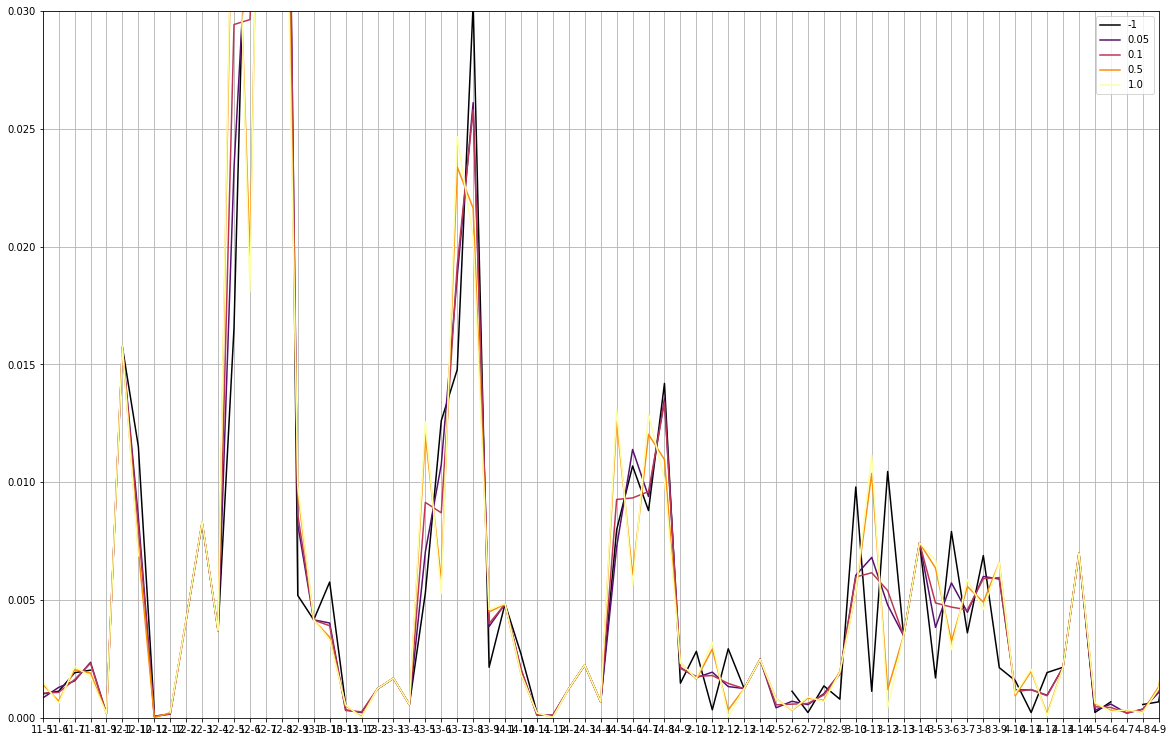

In [103]:
fig, ax = plt.subplots(figsize=(20,13))
parallel_coordinates(df, 'beta', axvlines= False, colormap="inferno")
ax.set_ylim(0,0.03)
ax.set_xlim(30,100)
plt.show()

In [104]:
test = sklearn.metrics.pairwise.nan_euclidean_distances([[1,    1]], [[1,1]])
print(test)

[[0.]]


In [111]:
#df = df.drop(columns=["beta"])
for index, row in df.iterrows():
    #print(index)
    #print(df.iloc[index, 1:])
    a = df.iloc[0, 1:].transpose()
    b = df.iloc[index, 1:].transpose()
    res = sklearn.metrics.pairwise.nan_euclidean_distances(a.to_numpy().reshape(1,-1), b.to_numpy().reshape(1,-1))
    print(df.iloc[index,0], res)

-1 [[3.80901514e-09]]
0.05 [[0.03682692]]
0.1 [[0.04085663]]
0.5 [[0.07221129]]
1.0 [[0.07983633]]
